In [1]:
import numpy as np
import logging

from IonDiff import identify_diffusion as ID_library

from datetime import datetime

Identification of diffusive paths from a molecular dynamics simulation and calculation of the ionic-diffusion coefficient.

At the input folder, a XDATCAR file with all the configurations of the system through simulation is required.
Optionally, a POSCAR can be supplied with the initial configuration.
As well, an INCAR specifying POTIM (simulation time step) and NBLOCK (number of simulation steps between
consecutive configurations in the XDATCAR) is necessary.

In [2]:
class args:
    def __init__(self):
        args.MD_path = 'LLZO/400K'  # Path to the input molecular dynamics simulation files
        args.classifier = 'K-means'  # Name of the classifier used to group non-diffusive particles ("K-means" or "Spectral")
        args.distance_thd = 0.4  # Distance threshold from the diffusive path to the vibrational center
        args.silhouette_thd = 0.7  # Silhouette value threshold for selecting the correct number of vibrational groups
        args.make_plot = False  # Whether to plot the clustering calculations or not
        args.n_attempts = 10  # Number of considered possible diffusive events during a simulation
        args.diffusion_particle = 'Li'  # Species from which to compute the ionic-diffusion coefficient
        args.back_hopping_thd = 0.3  # Distance threshold for back-hopping events

# Initialize class
args = args()

In [3]:
# Configuring loggin information
logging.basicConfig(
    filename=f'../logs/identify_diffusion_{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.log',
    format='%(asctime)s - [%(levelname)s] - %(message)s',
    level=logging.INFO,
)

# Performing the specified task
# Logging update
logging.info(f'Task: Extracting diffusive paths from MD simulation at {args.MD_path}.')

# Calling the library and loading the class
inp = ID_library.xdatcar(args)

# Logging update
logging.info(f'Simulation successfully loaded.')

# Computing the diffusive paths
diffusive_paths = inp.get_diffusion(args)

# Saving the results
np.savetxt(f'{args.MD_path}/DIFFUSION', diffusive_paths)

# Logging update
logging.info(f'Diffusive information successfully extracted and saved.')

Number of clusters: 1 with SA = 0.25408989334928844
Number of clusters: 1 with SA = 0.2561183273312837
Number of clusters: 2 with SA = 0.8819585318707173
Number of clusters: 1 with SA = 0.3055059346255425
Number of clusters: 1 with SA = 0.2501447044099136
Number of clusters: 1 with SA = 0.2490761336843099
Number of clusters: 1 with SA = 0.23499517993797536
Number of clusters: 1 with SA = 0.35326687419551844
Number of clusters: 1 with SA = 0.34056958013168553
Number of clusters: 2 with SA = 0.83385376063992
Number of clusters: 1 with SA = 0.3429166291480961
Number of clusters: 2 with SA = 0.855647855216905
Number of clusters: 1 with SA = 0.3531145500545775
Number of clusters: 1 with SA = 0.3821097832011859
Number of clusters: 1 with SA = 0.3411915765602444
Number of clusters: 2 with SA = 0.7831989110375371
Number of clusters: 1 with SA = 0.3646050696372253
Number of clusters: 1 with SA = 0.36178751652573926
Number of clusters: 1 with SA = 0.34150829839198316
Number of clusters: 1 with S

/Users/cibran/Work/UPC/IonDiff/IonDiff/identify_diffusion.py:233: RuntimeWarning: Mean of empty slice
  particles_avg = np.nanmean(self_scalar_product, axis=-1)  # Raises warning due to NaNs in some positions
/Users/cibran/Work/UPC/IonDiff/IonDiff/identify_diffusion.py:236: RuntimeWarning: Mean of empty slice
  MSD_self = np.nanmean(particles_avg, axis=-1)


Ionic-diffusion coefficient: 0.0016


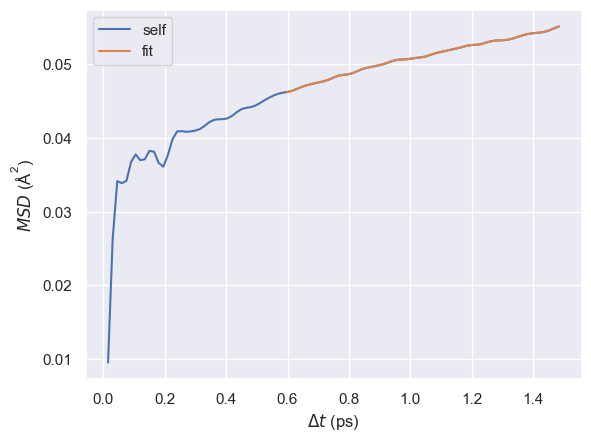

In [4]:
# Compute the ionic-diffusion coefficient
args.make_plot = True

inp.get_diffusion_coefficient(args, contributions='self', n_delta_t=100, axis=0)